<a href="https://colab.research.google.com/github/SanskarAgrahari-07/Deep-Learning-and-Neural-Networks-Lab-Work/blob/main/DDNN_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

file_path = "/content/Custom_CNN_Features.csv"
data = pd.read_csv(file_path)

print("Data Types of Attributes:")
print(data.info())

# Missing values if any and how to perform imputations
print("\nMissing Values After Imputation:")
print(data.isnull().sum())

Data Types of Attributes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3253 entries, 0 to 3252
Columns: 202 entries, Filename to f199
dtypes: float64(174), int64(27), object(1)
memory usage: 5.0+ MB
None

Missing Values After Imputation:
Filename       0
Class Label    0
f0             0
f1             0
f2             0
              ..
f195           0
f196           0
f197           0
f198           0
f199           0
Length: 202, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
if 'Class Label' in data.columns:
    print("\nClass Balance:")
    print(data['Class Label'].value_counts())




Class Balance:
Class Label
1    1634
0    1055
2     564
Name: count, dtype: int64


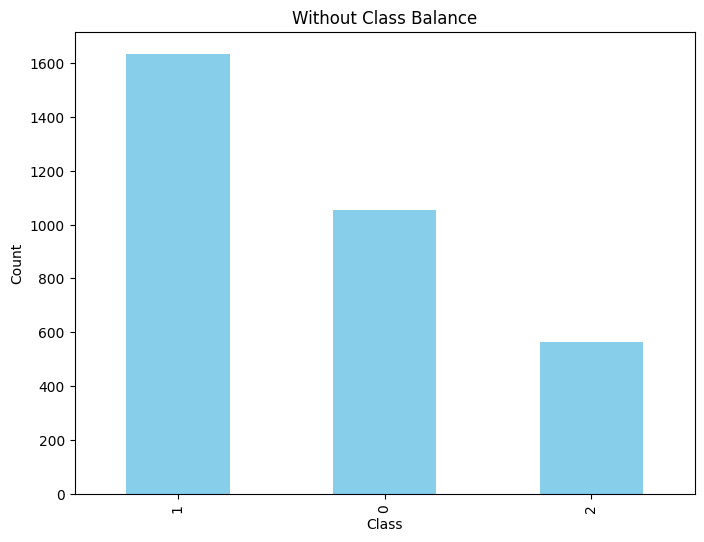

In [ ]:
 # Visualize class distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
data['Class Label'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Without Class Balance")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

Initial Class Distribution:
Class Label
1    1634
0    1055
2     564
Name: count, dtype: int64

Balanced Class Distribution:
Class Label
1    564
2    564
0    564
Name: count, dtype: int64


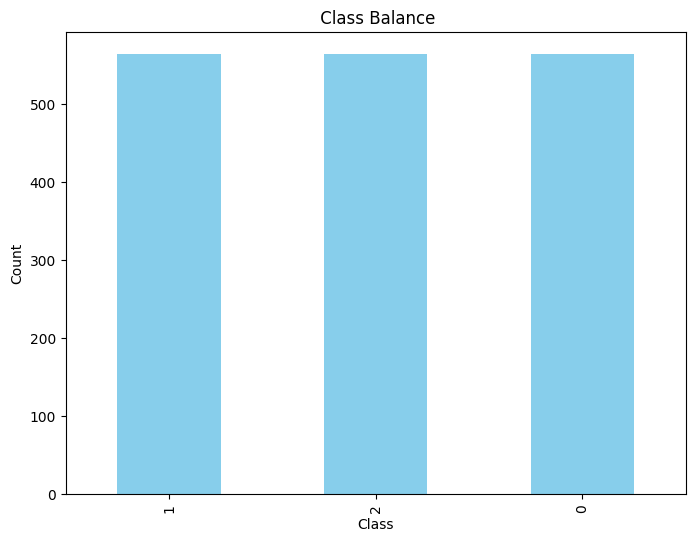

In [ ]:
from sklearn.utils import resample

# Display initial class distribution
print("Initial Class Distribution:")
print(data['Class Label'].value_counts())

# Separate the dataset by class
class_0 = data[data['Class Label'] == 0]
class_1 = data[data['Class Label'] == 1]
class_2 = data[data['Class Label'] == 2]

# Determine the minority class count
min_samples = min(len(class_0), len(class_1), len(class_2))

# Undersample each class to match the minority class count
class_0_downsampled = resample(class_0, replace=False, n_samples=min_samples, random_state=42)
class_1_downsampled = resample(class_1, replace=False, n_samples=min_samples, random_state=42)
class_2_downsampled = resample(class_2, replace=False, n_samples=min_samples, random_state=42)

# Combine the undersampled classes
balanced_data = pd.concat([class_0_downsampled, class_1_downsampled, class_2_downsampled])

# Shuffle the data
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the new class distribution
print("\nBalanced Class Distribution:")
print(balanced_data['Class Label'].value_counts())

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
balanced_data['Class Label'].value_counts().plot(kind='bar', color='skyblue')
plt.title(" Class Balance")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


Correlation Matrix (Class Label Only):
      Class Label
f1      -0.738423
f2      -0.831667
f3      -0.823682
f4      -0.617039
f5      -0.831960
...           ...
f195    -0.817357
f196    -0.838311
f197    -0.305215
f198    -0.759061
f199     0.228766

[199 rows x 1 columns]


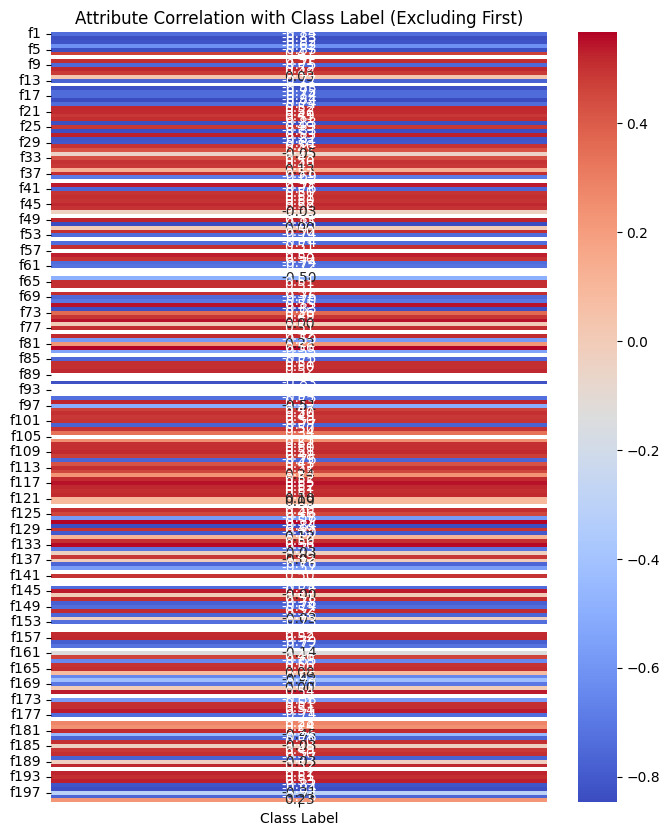

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

   # Assuming 'balanced_data' is your DataFrame and 'ImageColumn' is the name of the column with string values
numerical_data = balanced_data.select_dtypes(include=['number'])  # Select only numerical columns

correlation_matrix = numerical_data.corr()[['Class Label']].drop('Class Label', axis=0)
correlation_matrix = correlation_matrix.iloc[1:]  # Remove first element

print("Correlation Matrix (Class Label Only):")
print(correlation_matrix)

# Create the heatmap
plt.figure(figsize=(8, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Attribute Correlation with Class Label (Excluding First)")
plt.show()

In [ ]:
# Matrix rank study to find the dimensionality of data cloud
rank = np.linalg.matrix_rank(data.select_dtypes(include=[np.number]).values)  # Numerical columns only
print(f"\nMatrix Rank: {rank}")




Matrix Rank: 175


In [ ]:
# 6. Data Range and Normalization
print("\nData Range Before Normalization:")
print(data.describe())  # Summary statistics
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_cols = data.select_dtypes(include=[np.number]).columns  # Numerical columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

print("\nData Range After Normalization:")
print(data.describe())

# Save the processed dataset (if needed)
processed_file_path = "flow_processed.csv"
data.to_csv(processed_file_path, index=False)
print(f"\nProcessed data saved to {processed_file_path}")


Data Range Before Normalization:
       Class Label           f0           f1           f2           f3  \
count  3253.000000  3253.000000  3253.000000  3253.000000  3253.000000   
mean      0.849062    17.516938    57.919104   112.822180   170.829473   
std       0.689245    54.948034    93.672074    96.561850   124.512873   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000    46.988506    85.638191   
50%       1.000000     0.000000     0.000000    93.278381   160.636246   
75%       1.000000     0.000000   117.704697   159.855179   248.145508   
max       2.000000   781.789490   459.207794   536.879639   760.753845   

                f4           f5           f6      f7            f8  ...  \
count  3253.000000  3253.000000  3253.000000  3253.0   3253.000000  ...   
mean     17.606476   141.614480    11.035532     0.0    214.312125  ...   
std      35.626627    99.128478    20.554964     0.0    738.811309  ...   

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelBinarizer, StandardScaler

# Load dataset
data = pd.read_csv('/content/Custom_CNN_Features.csv')

# Drop file name column
if 'Filename' in data.columns:
    data = data.drop(columns=['Filename'])
elif 'Image' in data.columns:
    data = data.drop(columns=['Image'])
else:
    print("File name column not found in the dataset.")

# Define features (X) and target (y)
X = data.drop(columns=['Class Label'])
y = data['Class Label']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Scale data for algorithms like SVM and kNN
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Initialize classifiers
classifiers = {
    "kNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Naïve Bayes": GaussianNB()
}

# Evaluate classifiers
results = []

for name, clf in classifiers.items():
    # Train the classifier
    if name in ["kNN", "SVM"]:  # Use scaled data for kNN and SVM
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
        y_pred_proba = clf.predict_proba(X_test_scaled) if hasattr(clf, 'predict_proba') else None
    else:  # Use original data for other classifiers
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_pred_proba = clf.predict_proba(X_test) if hasattr(clf, 'predict_proba') else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Calculate AUROC (requires binarized labels for multiclass)
    if y_pred_proba is not None:
        lb = LabelBinarizer()
        y_test_binarized = lb.fit_transform(y_test)
        auroc = roc_auc_score(y_test_binarized, y_pred_proba, average='weighted', multi_class='ovr')
    else:
        auroc = "N/A"  # AUROC not available for models without probability outputs

    # Store results
    results.append({
        "Classifier": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUROC": auroc
    })

# Display results
results_df = pd.DataFrame(results)
print("\nClassification Results:")
print(results_df)

# Save results to a CSV
results_df.to_csv("classification_results.csv", index=False)
print("\nResults saved to 'classification_results.csv'")



Classification Results:
      Classifier  Accuracy  Precision    Recall  F1-Score     AUROC
0            kNN  0.936118   0.938236  0.936118  0.935982  0.971471
1  Decision Tree  0.884521   0.885260  0.884521  0.884532  0.904344
2  Random Forest  0.937346   0.939560  0.937346  0.937253  0.982097
3            SVM  0.947174   0.949097  0.947174  0.947030  0.978419
4    Naïve Bayes  0.937346   0.938457  0.937346  0.937370  0.965816

Results saved to 'classification_results.csv'


In [4]:
# Function to evaluate train and test set performance
def evaluate_fit(X_train, X_test, y_train, y_test, clf, name):
    results = {}

    # Predictions on training set
    y_train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted', zero_division=0)

    # Predictions on testing set
    y_test_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

    # Compare train and test performance
    fit_status = ""
    if train_accuracy < 0.7 and test_accuracy < 0.7:
        fit_status = "Underfit"
    elif train_accuracy > test_accuracy + 0.1:
        fit_status = "Overfit"
    else:
        fit_status = "Regular Fit"

    # Store results
    results['Classifier'] = name
    results['Train Accuracy'] = train_accuracy
    results['Test Accuracy'] = test_accuracy
    results['Train F1-Score'] = train_f1
    results['Test F1-Score'] = test_f1
    results['Fit Status'] = fit_status

    return results

# Evaluate models
fit_results = []
for name, clf in classifiers.items():
    if name in ["kNN", "SVM"]:  # Use scaled data for kNN and SVM
        fit_results.append(evaluate_fit(X_train_scaled, X_test_scaled, y_train, y_test, clf, name))
    else:  # Use original data for other classifiers
        fit_results.append(evaluate_fit(X_train, X_test, y_train, y_test, clf, name))

# Display fit results
fit_results_df = pd.DataFrame(fit_results)
print("\nFit Results:")
print(fit_results_df)




Fit Results:
      Classifier  Train Accuracy  Test Accuracy  Train F1-Score  \
0            kNN        0.945059       0.936118        0.945021   
1  Decision Tree        1.000000       0.884521        1.000000   
2  Random Forest        1.000000       0.937346        1.000000   
3            SVM        0.927839       0.947174        0.927742   
4    Naïve Bayes        0.919639       0.937346        0.919666   

   Test F1-Score   Fit Status  
0       0.935982  Regular Fit  
1       0.884532      Overfit  
2       0.937253  Regular Fit  
3       0.947030  Regular Fit  
4       0.937370  Regular Fit  


In [5]:
import time

# Function to evaluate model timings
def evaluate_timings(X_train, X_test, y_train, y_test, clf, name):
    results = {}

    # Record the start time for training
    start_train = time.time()
    clf.fit(X_train, y_train)
    end_train = time.time()

    # Record the start time for prediction
    start_predict = time.time()
    y_test_pred = clf.predict(X_test)
    end_predict = time.time()

    # Calculate timings
    train_time = end_train - start_train
    predict_time = end_predict - start_predict

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

    # Store results
    results['Classifier'] = name
    results['Train Time (s)'] = train_time
    results['Predict Time (s)'] = predict_time
    results['Test Accuracy'] = accuracy
    results['Test F1-Score'] = f1

    return results

# Measure timings for all classifiers
timing_results = []
for name, clf in classifiers.items():
    if name in ["kNN", "SVM"]:  # Use scaled data for kNN and SVM
        timing_results.append(evaluate_timings(X_train_scaled, X_test_scaled, y_train, y_test, clf, name))
    else:  # Use original data for other classifiers
        timing_results.append(evaluate_timings(X_train, X_test, y_train, y_test, clf, name))

# Display timing results
timing_results_df = pd.DataFrame(timing_results)
print("\nTiming Results:")
print(timing_results_df)





Timing Results:
      Classifier  Train Time (s)  Predict Time (s)  Test Accuracy  \
0            kNN        0.015558          0.081911       0.936118   
1  Decision Tree        0.250703          0.003288       0.884521   
2  Random Forest        1.303543          0.022680       0.937346   
3            SVM        1.264317          0.159966       0.947174   
4    Naïve Bayes        0.013946          0.007008       0.937346   

   Test F1-Score  
0       0.935982  
1       0.884532  
2       0.937253  
3       0.947030  
4       0.937370  
